##Условие 1:
###Задача 1
Постройте график <br>
Назовите график <br>
Сделайте именование оси x и оси y <br>
Сделайте выводы

1.1. Скачать следующие данные: kc-house-data


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


1.2. Изучите стоимости недвижимости


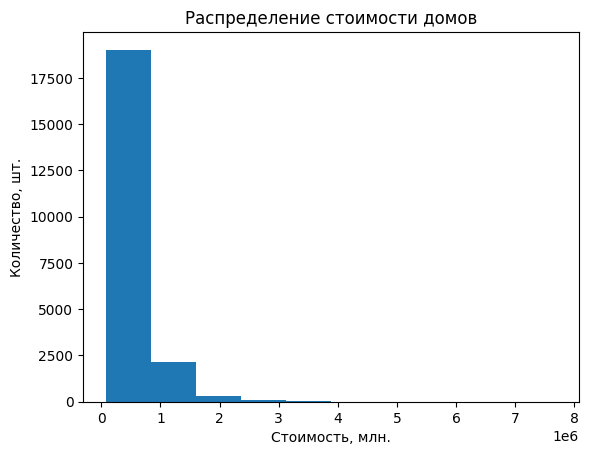

In [94]:
plt.hist((df['price']))
plt.title('Распределение стоимости домов')
plt.xlabel('Стоимость, млн.')
plt.ylabel('Количество, шт.');

1.3. Изучите распределение квадратуры жилой


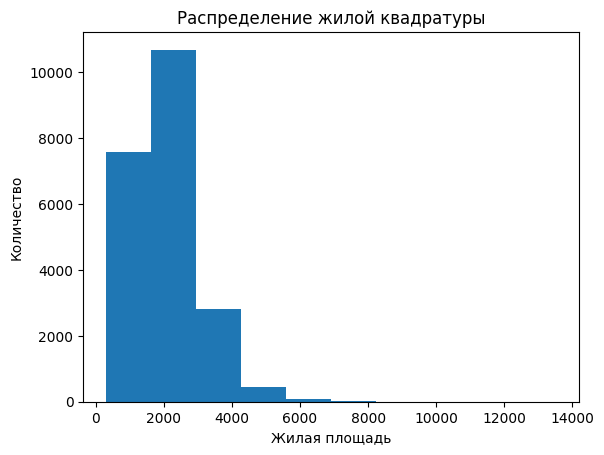

In [95]:
plt.hist(df['sqft_living'])
plt.title('Распределение жилой квадратуры')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество');

1.4. Изучите распределение года постройки

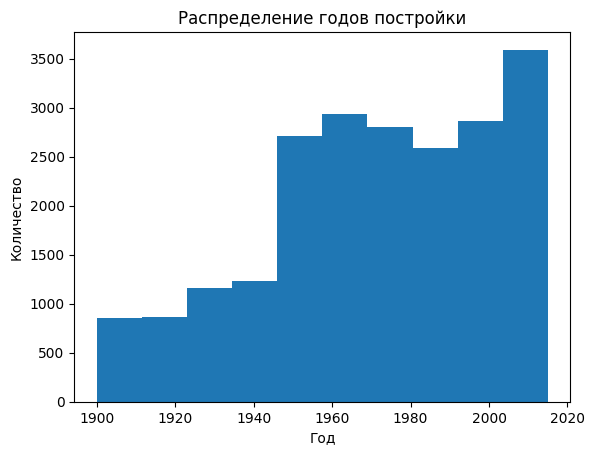

In [96]:
plt.hist(df['yr_built'])
plt.title('Распределение годов постройки')
plt.xlabel('Год')
plt.ylabel('Количество');

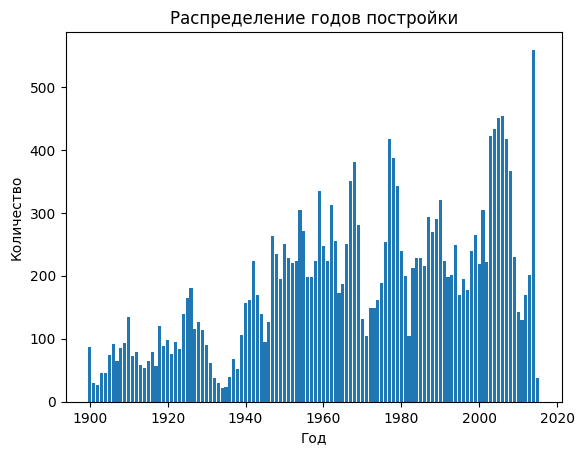

In [97]:
year = df['yr_built'].value_counts()
plt.bar(year.index, year.values)
plt.title('Распределение годов постройки')
plt.xlabel('Год')
plt.ylabel('Количество');

##Условие 2:
###2 задача
2.1. Изучите распределение домов от наличия вида на набережную <br>
Постройте график<br>
Сделайте выводы<br>


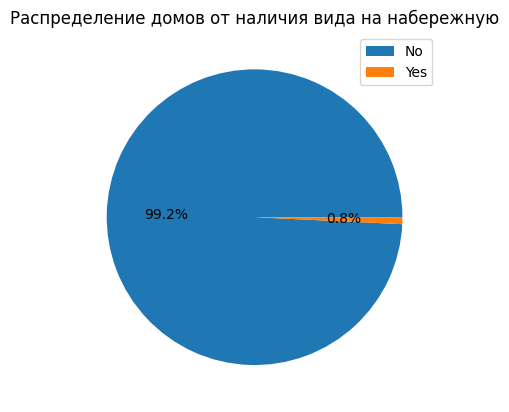

In [98]:
plt.pie(df['waterfront'].value_counts(), autopct='%1.1f%%')
plt.title('Распределение домов от наличия вида на набережную')
plt.legend(['No', 'Yes']);

**Вывод:**<br>
В представленных данных менее 1% домов имеют вид на набережную, ~ 99% домов расположены в удалении от океана.

2.2. Изучите распределение этажей домов


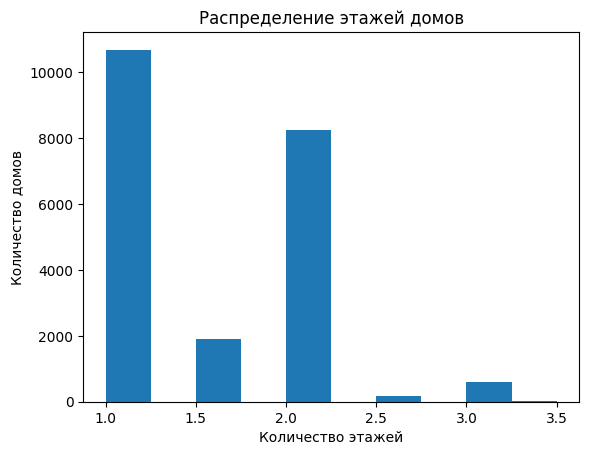

In [99]:
plt.hist(df['floors'])
plt.title('Распределение этажей домов')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов');

2.3. Изучите распределение состояния домов

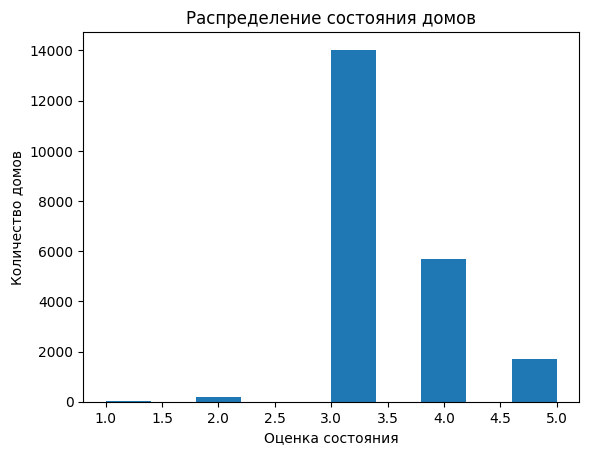

In [100]:
plt.hist(df['condition'])
plt.title('Распределение состояния домов')
plt.xlabel('Оценка состояния')
plt.ylabel('Количество домов');

##Условие 3:
###3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [101]:
import seaborn as sns
import numpy as np

In [102]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix['price']

<ipython-input-102-e792ad947d6a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


id               0.0
price            1.0
bedrooms         0.3
bathrooms        0.5
sqft_living      0.7
sqft_lot         0.0
floors           0.3
waterfront       0.3
view             0.4
condition        0.0
grade            0.7
sqft_above       0.6
sqft_basement    0.3
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.3
long             0.0
sqft_living15    0.6
sqft_lot15       0.0
Name: price, dtype: float64

<Axes: >

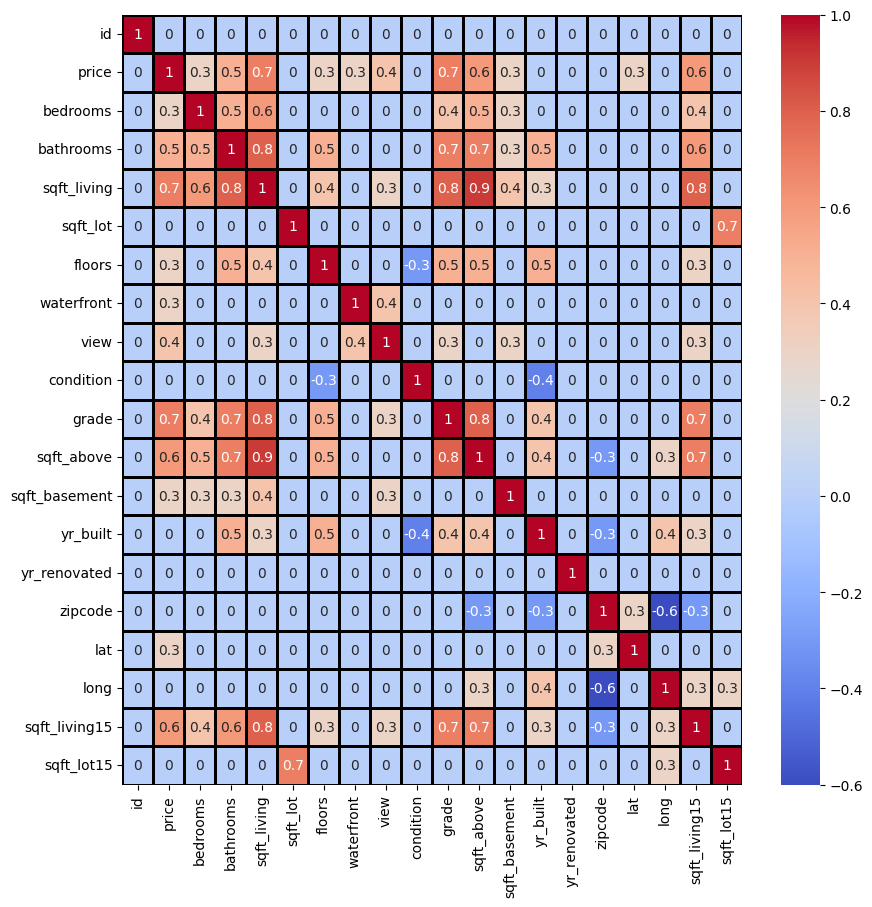

In [103]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, annot=True, fmt='.1g', cmap='coolwarm', linewidths=1, linecolor='black')

Построим графики по нескольким показателям, имеющим корреляцию с ценой.

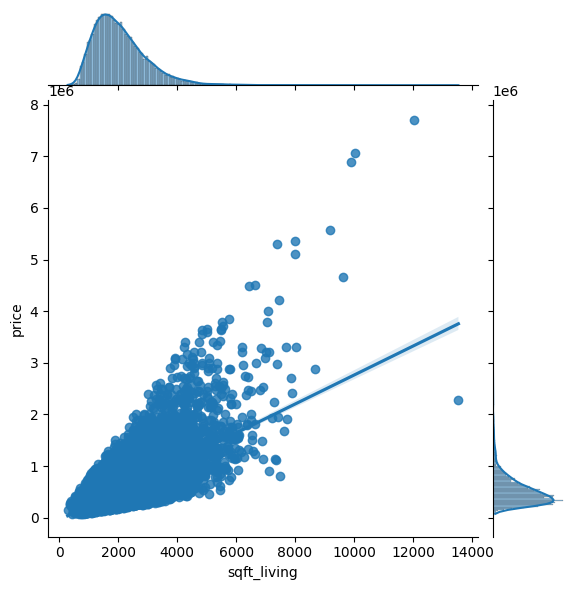

In [104]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg')

Жилая площадь имеет среднюю корреляцию со стоимостью дома

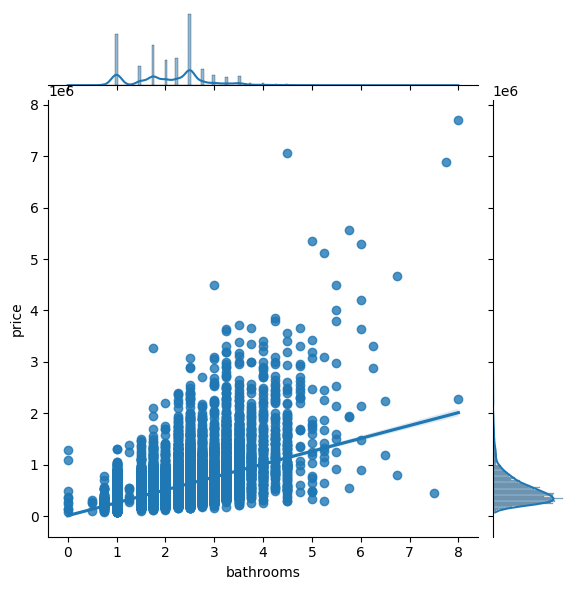

In [105]:
sns.jointplot(x=df['bathrooms'], y=df['price'], kind='reg')

Количество ванных комнат имеет среднюю корреляцию со стоимостью дома

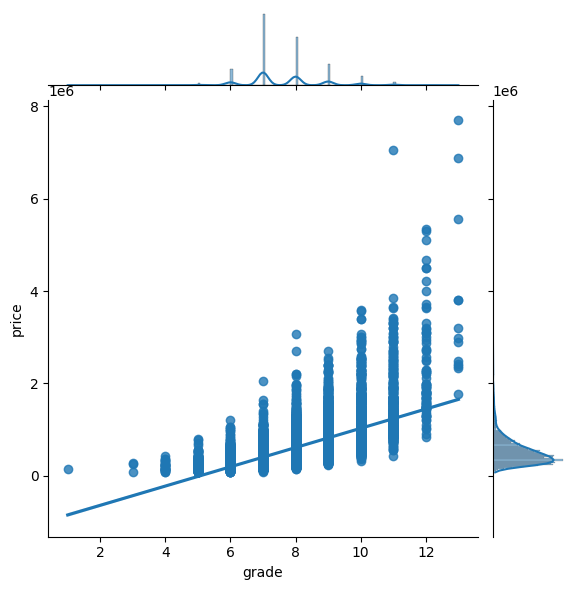

In [106]:
sns.jointplot(x=df['grade'], y=df['price'], kind='reg')

Оценка дома имеет среднюю корреляцию со стоимостью дома

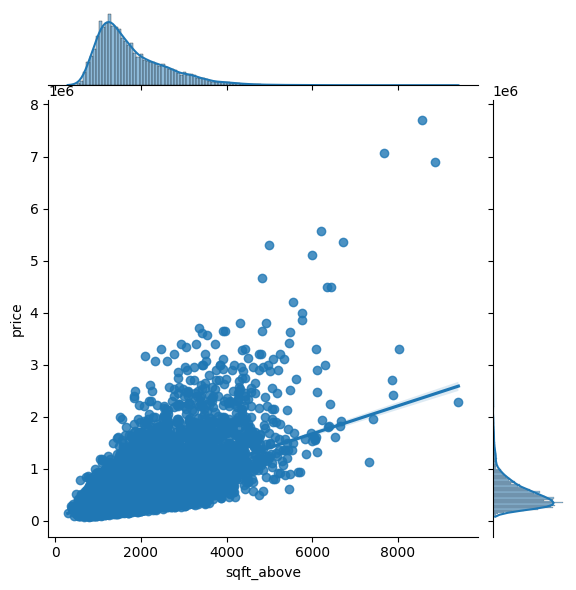

In [107]:
sns.jointplot(x=df['sqft_above'], y=df['price'], kind='reg')

Площадь дома над поверхностью земли имеет среднюю корреляцию со стоимостью дома

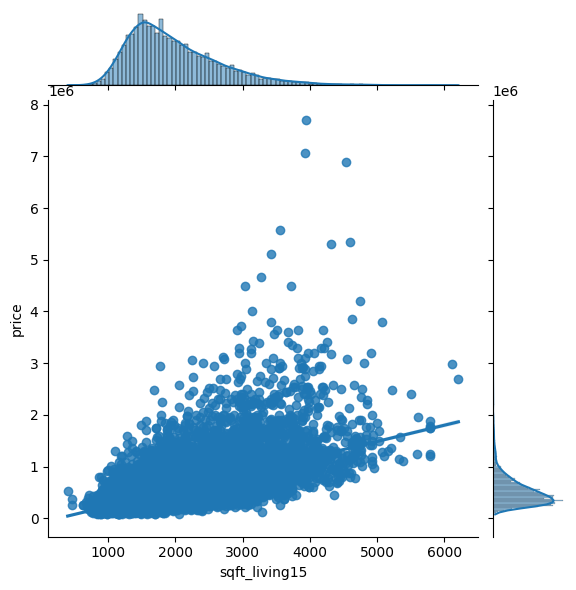

In [108]:
sns.jointplot(x=df['sqft_living15'], y=df['price'], kind='reg')

Площадь у 15 соседей имеет среднюю корреляцию со стоимостью дома